In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
import keras
import cv2
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout

In [4]:
import os

In [5]:
path1="G:\KomalPuja"
cate=['Komal','Puja']

In [6]:
for i in cate:
    folders=os.path.join(path1,i)
    print(folders)

G:\KomalPuja\Komal
G:\KomalPuja\Puja


In [7]:
for i in cate:
    folders=os.path.join(path1,i)
    for image in os.listdir(folders):
        image_path=os.path.join(folders,image)
        print(image_path)

G:\KomalPuja\Komal\IMG-20190128-WA0002.jpg
G:\KomalPuja\Komal\IMG-20190211-WA0042.jpg
G:\KomalPuja\Komal\IMG-20190307-WA0017.jpg
G:\KomalPuja\Komal\IMG-20190519-WA0049.jpg
G:\KomalPuja\Komal\IMG20210808145846.jpg
G:\KomalPuja\Komal\IMG_20190927_120835.JPG
G:\KomalPuja\Komal\IMG_20200102_212234.JPG
G:\KomalPuja\Komal\IMG_20200425_203257.JPG
G:\KomalPuja\Komal\IMG_20200425_203733.JPG
G:\KomalPuja\Komal\IMG_20200708_105813.JPG
G:\KomalPuja\Komal\IMG_20201224_141634.jpg
G:\KomalPuja\Komal\IMG_20211119_160719.jpg
G:\KomalPuja\Komal\IMG_20211123_181815.jpg
G:\KomalPuja\Komal\PicsArt_01-31-09.43.32.jpg
G:\KomalPuja\Komal\PicsArt_02-06-07.43.06.jpg
G:\KomalPuja\Komal\PicsArt_03-10-09.07.12.jpg
G:\KomalPuja\Komal\PicsArt_03-14-04.50.47.jpg
G:\KomalPuja\Komal\PicsArt_03-16-11.42.14.jpg
G:\KomalPuja\Komal\PicsArt_07-18-08.04.47.jpg
G:\KomalPuja\Komal\PicsArt_12-15-12.20.59.jpg
G:\KomalPuja\Komal\PicsArt_12-22-07.18.19.png
G:\KomalPuja\Puja\IMG-20211123-WA0015.jpg
G:\KomalPuja\Puja\IMG-20211123-WA

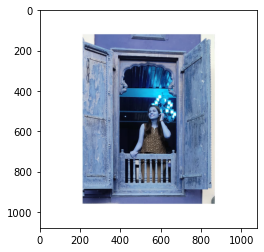

In [8]:
for i in cate:
    folders=os.path.join(path1,i)
    for image in os.listdir(folders):
        image_path=os.path.join(folders,image)
        image_array=cv2.imread(image_path)
        plt.imshow(image_array)
        
        
        
# Till this point we have x but y is missing.

In [9]:
image_size=200
input_image=[]
for i in cate:
    folders=os.path.join(path1,i)
    label=cate.index(i)
    for image in os.listdir(folders):
        image_path=os.path.join(folders,image)
        image_array=cv2.imread(image_path)
        image_array=cv2.resize(image_array,(image_size,image_size))
        input_image.append([image_array,label])

In [10]:
input_image[9]

[array([[[141, 144, 158],
         [140, 143, 157],
         [141, 144, 158],
         ...,
         [136, 140, 152],
         [138, 141, 155],
         [138, 142, 153]],
 
        [[146, 150, 163],
         [143, 146, 160],
         [146, 149, 163],
         ...,
         [139, 144, 153],
         [135, 139, 148],
         [135, 140, 149]],
 
        [[147, 150, 161],
         [146, 150, 161],
         [148, 152, 163],
         ...,
         [138, 143, 152],
         [138, 143, 153],
         [135, 140, 149]],
 
        ...,
 
        [[ 30,  28,  34],
         [ 32,  33,  37],
         [ 37,  35,  38],
         ...,
         [ 20,  21,  25],
         [ 18,  17,  25],
         [ 21,  20,  29]],
 
        [[ 35,  34,  38],
         [ 37,  36,  40],
         [ 37,  36,  38],
         ...,
         [ 23,  24,  28],
         [ 16,  17,  21],
         [ 18,  18,  24]],
 
        [[ 38,  37,  41],
         [ 38,  35,  37],
         [ 40,  36,  41],
         ...,
         [ 27,  27,  31],
  

In [11]:
len(input_image)

42

In [12]:
np.random.shuffle(input_image)
X=[]
Y=[]

for X_values,labels in input_image:
    X.append(X_values)
    Y.append(labels)

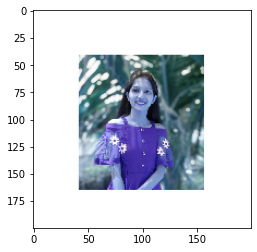

In [13]:
plt.imshow(X[0])

In [14]:
X=np.array(X)
Y=np.array(Y)
X=X/255

model=Sequential()
model.add(Conv2D(filters=100,kernel_size=(3,3),activation='relu',))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(50,activation='relu',input_shape=X.shape[1:]))
model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax'))

In [15]:
adam=tf.keras.optimizers.Adam(lr=.001)
model.compile(optimizer=adam,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

C:\Users\Komal S Boraste\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [16]:
model.fit(X,Y,epochs=25)

Epoch 1/25
2/2 [==============================] - 7s 844ms/step - loss: 19.6036 - accuracy: 0.4048
Epoch 2/25
2/2 [==============================] - 3s 814ms/step - loss: 10.8684 - accuracy: 0.5476
Epoch 3/25
2/2 [==============================] - 3s 856ms/step - loss: 21.7675 - accuracy: 0.4286
Epoch 4/25
2/2 [==============================] - 3s 744ms/step - loss: 3.6787 - accuracy: 0.6429
Epoch 5/25
2/2 [==============================] - 3s 765ms/step - loss: 5.9396 - accuracy: 0.5714
Epoch 6/25
2/2 [==============================] - 3s 802ms/step - loss: 3.8193 - accuracy: 0.6190
Epoch 7/25
2/2 [==============================] - 3s 690ms/step - loss: 1.9809 - accuracy: 0.5952
Epoch 8/25
2/2 [==============================] - 3s 891ms/step - loss: 0.2891 - accuracy: 0.9048
Epoch 9/25
2/2 [==============================] - 3s 743ms/step - loss: 0.1035 - accuracy: 0.9762
Epoch 10/25
2/2 [==============================] - 3s 784ms/step - loss: 0.1871 - accuracy: 0.9524
Epoch 11/25
2/2 

In [17]:
from sklearn.metrics import confusion_matrix

In [18]:
predict_x=model.predict(X)   
classes_x=np.argmax(predict_x,axis=1) 

In [19]:
a=confusion_matrix(classes_x,Y)

In [20]:
a

array([[21,  0],
       [ 0, 21]], dtype=int64)

In [21]:
accuracy=a.diagonal().sum()/a.sum()

In [22]:
accuracy

1.0

In [23]:
pwd

'C:\\Users\\Komal S Boraste\\Desktop\\python1'

In [24]:
model.save("KomalPuja.h5")

In [26]:
import cv2
import numpy as np
from keras.models import load_model

model=load_model("KomalPuja.h5")

results={0:'Komal',1:'Puja'}
GR_dict={0:(0,255,255),1:(0,255,0)}

rect_size = 4
cap = cv2.VideoCapture(0) 


haarcascade = cv2.CascadeClassifier("G:/Harcascade/haarcascade_frontalface_default (1).xml")
while True:
    (rval, im) = cap.read()
    im=cv2.flip(im,1,1) 

    
    rerect_size = cv2.resize(im, (im.shape[1] // rect_size, im.shape[0] // rect_size))
    faces = haarcascade.detectMultiScale(rerect_size)
    for f in faces:
        (x, y, w, h) = [v * rect_size for v in f] 
        
        face_img = im[y:y+h, x:x+w]
        rerect_sized=cv2.resize(face_img,(200,200))
        normalized=rerect_sized/255.0
        reshaped=np.reshape(normalized,(1,200,200,3))
        reshaped = np.vstack([reshaped])
        result=model.predict(reshaped)

        
        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(im,(x,y),(x+w,y+h),GR_dict[label],2)
        cv2.rectangle(im,(x,y-40),(x+w,y),GR_dict[label],-1)
        cv2.putText(im, results[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,0,0),2)

    cv2.imshow('Liv Camera',   im)
    key = cv2.waitKey(10)
    
    if key == 27: # use the escape key
        break

cap.release()

cv2.destroyAllWindows()